In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
movies=pd.read_csv("./src/ml-25m/movies.csv")
ratings=pd.read_csv("./src/ml-25m/ratings.csv")

# Movies dataset:



In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [5]:
movies.drop_duplicates() # no duplicates
len(movies.movieId.unique())

62423

**Create new column with year of the movie:**

In [89]:
movies["year"]=[y[-5:-1] for y in movies.title]
movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,tory
1,2,Jumanji,Adventure|Children|Fantasy,anji
2,3,Grumpier Old Men,Comedy|Romance,Men
3,4,Waiting to Exhale,Comedy|Drama|Romance,hale
4,5,Father of the Bride Part II,Comedy,t II


**Create list with different genres and then create a new dataframe with genres columns:**

In [7]:
genre_list = ""
for index,row in movies.iterrows():
        genre_list += row.genres + "|"
        
genre_list_split = genre_list.split('|')
genre_list_split= list(set(genre_list_split)) # eliminate duplicates
genre_list_split.remove('') #remove blanks
print(len(genre_list_split))
genre_list_split

20


['Documentary',
 'Adventure',
 'Musical',
 'Horror',
 'Children',
 'Romance',
 'Comedy',
 '(no genres listed)',
 'IMAX',
 'Crime',
 'Action',
 'Animation',
 'Film-Noir',
 'Fantasy',
 'Sci-Fi',
 'Drama',
 'Thriller',
 'War',
 'Western',
 'Mystery']

In [8]:
movies_genres=movies.copy()
for genre in genre_list_split:
    movies_genres[genre]=movies_genres.apply(lambda _:int(genre in _.genres), axis = 1)

In [9]:
movies_genres.head()

,movieId,title,genres,year,Documentary,Adventure,Musical,Horror,Children,Romance,...,Action,Animation,Film-Noir,Fantasy,Sci-Fi,Drama,Thriller,War,Western,Mystery
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,2,Jumanji,Adventure|Children|Fantasy,1995,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,3,Grumpier Old Men,Comedy|Romance,1995,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,Comedy,1995,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Ratings Dataset:

In [10]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [11]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


In [12]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [13]:
ratings.isnull().sum()#no null values

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [14]:
ratings["rating"].value_counts()

4.0    6639798
3.0    4896928
5.0    3612474
3.5    3177318
4.5    2200539
2.0    1640868
2.5    1262797
1.0     776815
1.5     399490
0.5     393068
Name: rating, dtype: int64

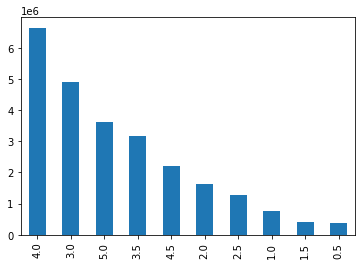

In [15]:
ratings["rating"].value_counts().plot.bar()

In [16]:
ratings.timestamp=pd.to_datetime(ratings.timestamp)

In [17]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1970-01-01 00:00:01.147880044
1,1,306,3.5,1970-01-01 00:00:01.147868817
2,1,307,5.0,1970-01-01 00:00:01.147868828
3,1,665,5.0,1970-01-01 00:00:01.147878820
4,1,899,3.5,1970-01-01 00:00:01.147868510


**Check if users have rated the same movie different times. In this case, we take the max rating:**

In [18]:
ratings_user=ratings.groupby(['userId','movieId']).aggregate(np.max)
len(ratings_user) # no duplicates ratings for the same user for an specific movie

25000095

**Count unique users:**

In [19]:
len(ratings['userId'].unique())

162541

In [20]:
ratings.drop(columns="timestamp", inplace=True)

**Percent of rating values:**

In [21]:
ratings_count = ratings.groupby('rating').count() # count num of users and movies with each rating
ratings_count

,userId,movieId
rating,,
0.5,393068,393068
1.0,776815,776815
1.5,399490,399490
2.0,1640868,1640868
2.5,1262797,1262797
3.0,4896928,4896928
3.5,3177318,3177318
4.0,6639798,6639798
4.5,2200539,2200539


In [22]:
ratings_count['perc_total_rating']=round(ratings_count['userId']*100/ratings_count['userId'].sum(),1)
ratings_count

,userId,movieId,perc_total_rating
rating,,,
0.5,393068,393068,1.6
1.0,776815,776815,3.1
1.5,399490,399490,1.6
2.0,1640868,1640868,6.6
2.5,1262797,1262797,5.1
3.0,4896928,4896928,19.6
3.5,3177318,3177318,12.7
4.0,6639798,6639798,26.6
4.5,2200539,2200539,8.8


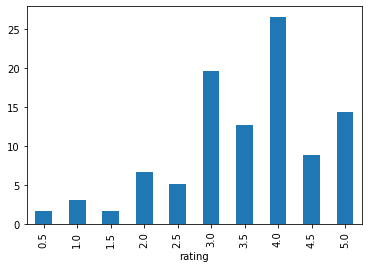

In [23]:
ratings_count['perc_total_rating'].plot.bar()

**Find the number of ratings for each user and calculate the average rating for each user:**

In [24]:
avg_user_rating = pd.DataFrame(ratings.groupby('userId')['rating'].agg(['count','mean']))
avg_user_rating.head()

,count,mean
userId,,
1,70,3.814286
2,184,3.630435
3,656,3.697409
4,242,3.378099
5,101,3.752475


**Find the number of ratings for each movie and calculate the average rating for movie:**

In [25]:
avg_movie_rating = pd.DataFrame(ratings.groupby('movieId')['rating'].agg(['count','mean']))
avg_movie_rating.head()

,count,mean
movieId,,
1,57309,3.893708
2,24228,3.251527
3,11804,3.142028
4,2523,2.853547
5,11714,3.058434


### Calculate rating score based on the IDMB formula:

IMDB uses this famous formula:

weighted rank (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C

 where:
  R = average for the movie (mean) = (Rating)
  v = number of votes for the movie = (votes)
  m = minimum votes required to be listed in the Top 250 (currently 1250)
  C = the mean vote across the whole report (currently 6.8)

This formula is exceedingly useful, but I have beef with the "m"
variable, because it's arbitrary. As far as I can tell, the other
three variables should be enough to calculate what score a movie would
have if it had a quadrillion votes.

**Find minimum votes required (number of ratings of percentile 70 of the movies):**

In [36]:
min_votes=np.percentile(avg_movie_rating['count'],70) #It gives the no of ratings at least 70% of the movies have
min_votes

22.0

**Find the average of ratings:**

In [ ]:
mean_vote=ratings['rating'].mean()
mean_vote

In [ ]:
movie_score = avg_movie_rating.loc[avg_movie_rating['count']>ratings] # select movies that have more than 22 ratings
movie_score.head()

In [ ]:
len(movie_score)

In [38]:
def weighted_rank(movie, m=ratings_min, C=avg_rating_all):
    v = movie['count'] #number of votes for the movie 
    R = movie['mean'] #average for the movie (mean) = (Rating)
    return (v/(v+m) * R) + (m/(m+v) * C)

In [39]:
movie_score['weighted_rank'] = movie_score.apply(weighted_rank, axis=1)
movie_score.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,count,mean,weighted_rank
movieId,,,
1,57309,3.893708,3.893570
2,24228,3.251527,3.251783
3,11804,3.142028,3.142757
4,2523,2.853547,2.859428
5,11714,3.058434,3.059326


In [50]:
movie_score["movieId"]=movie_score.index
movie_score=movie_score.rename_axis("id_movie")
movie_score.head()

,count,mean,weighted_rank,movieId
id_movie,,,,
1,57309,3.893708,3.893570,1
2,24228,3.251527,3.251783,2
3,11804,3.142028,3.142757,3
4,2523,2.853547,2.859428,4
5,11714,3.058434,3.059326,5


In [64]:
movies_info=pd.merge(movies_genres,movie_score,on='movieId')
movies_info.head()

,movieId,title,genres,year,Documentary,Adventure,Musical,Horror,Children,Romance,...,Fantasy,Sci-Fi,Drama,Thriller,War,Western,Mystery,count,mean,weighted_rank
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,0,1,0,0,1,0,...,1,0,0,0,0,0,0,57309,3.893708,3.893570
1,2,Jumanji,Adventure|Children|Fantasy,1995,0,1,0,0,1,0,...,1,0,0,0,0,0,0,24228,3.251527,3.251783
2,3,Grumpier Old Men,Comedy|Romance,1995,0,0,0,0,0,1,...,0,0,0,0,0,0,0,11804,3.142028,3.142757
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,0,0,0,0,0,1,...,0,0,1,0,0,0,0,2523,2.853547,2.859428
4,5,Father of the Bride Part II,Comedy,1995,0,0,0,0,0,0,...,0,0,0,0,0,0,0,11714,3.058434,3.059326


In [65]:
movies_links=pd.read_csv("./src/ml-25m/links.csv")
movies_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [66]:
movies_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [67]:
movies_info=pd.merge(movies_info,movies_links,on='movieId')
movies_info.head()

,movieId,title,genres,year,Documentary,Adventure,Musical,Horror,Children,Romance,...,Drama,Thriller,War,Western,Mystery,count,mean,weighted_rank,imdbId,tmdbId
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,0,1,0,0,1,0,...,0,0,0,0,0,57309,3.893708,3.893570,114709,862.0
1,2,Jumanji,Adventure|Children|Fantasy,1995,0,1,0,0,1,0,...,0,0,0,0,0,24228,3.251527,3.251783,113497,8844.0
2,3,Grumpier Old Men,Comedy|Romance,1995,0,0,0,0,0,1,...,0,0,0,0,0,11804,3.142028,3.142757,113228,15602.0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,0,0,0,0,0,1,...,1,0,0,0,0,2523,2.853547,2.859428,114885,31357.0
4,5,Father of the Bride Part II,Comedy,1995,0,0,0,0,0,0,...,0,0,0,0,0,11714,3.058434,3.059326,113041,11862.0


**Top Ranked movies:**

In [82]:
movies_info.sort_values(['weighted_rank'],ascending=False)[:10]

,movieId,title,genres,year,Documentary,Adventure,Musical,Horror,Children,Romance,...,Drama,Thriller,War,Western,Mystery,count,mean,weighted_rank,imdbId,tmdbId
16495,171011,Planet Earth II,Documentary,2016,1,0,0,0,0,0,...,0,0,0,0,0,1124,4.483096,4.464873,5491994,420714.0
15948,159817,Planet Earth,Documentary,2006,1,0,0,0,0,0,...,0,0,0,0,0,1747,4.464797,4.453219,795176,192040.0
311,318,"Shawshank Redemption, The",Crime|Drama,1994,0,0,0,0,0,0,...,1,0,0,0,0,81482,4.413576,4.413339,111161,278.0
16463,170705,Band of Brothers,Action|Drama|War,2001,0,0,0,0,0,0,...,1,0,1,0,0,1356,4.398599,4.384793,185906,331214.0
821,858,"Godfather, The",Crime|Drama,1972,0,0,0,0,0,0,...,1,0,0,0,0,52498,4.324336,4.324005,68646,238.0
49,50,"Usual Suspects, The",Crime|Mystery|Thriller,1995,0,0,0,0,0,0,...,0,1,0,0,1,55366,4.284353,4.284055,114814,629.0
16516,171495,,(no genres listed),osmo,0,0,0,0,0,0,...,0,0,0,0,0,277,4.326715,4.268377,81846,409926.0
16822,179135,Blue Planet II,Documentary,2017,1,0,0,0,0,0,...,0,0,0,0,0,659,4.289833,4.265411,6769208,463612.0
1161,1221,"Godfather: Part II, The",Crime|Drama,1974,0,0,0,0,0,0,...,1,0,0,0,0,34188,4.261759,4.261290,71562,240.0
1868,2019,Seven Samurai (Shichinin no samurai),Action|Adventure|Drama,1954,0,1,0,0,0,0,...,1,0,0,0,0,13367,4.254769,4.253585,47478,346.0


**Find top movies by genre:**

In [86]:
def moviesGenre(genre,top):
    return movies_info.loc[(movies_info[genre]==1)].sort_values(['weighted_rank'],ascending=False)[:top]

In [88]:
moviesGenre('Comedy',10)

,movieId,title,genres,year,Documentary,Adventure,Musical,Horror,Children,Romance,...,Drama,Thriller,War,Western,Mystery,count,mean,weighted_rank,imdbId,tmdbId
717,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,1964,0,0,0,0,0,0,...,0,0,1,0,0,26714,4.215804,4.215243,57012,935.0
289,296,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994,0,0,0,0,0,0,...,1,1,0,0,0,79672,4.188912,4.188731,110912,680.0
17427,202439,Parasite,Comedy|Drama,2019,0,0,0,0,0,0,...,1,0,0,0,0,496,4.209677,4.180975,6751668,496243.0
2161,2324,Life Is Beautiful (La Vita è bella),Comedy|Drama|Romance|War,1997,0,0,0,0,0,1,...,1,0,1,0,0,23976,4.154342,4.153773,118799,637.0
909,950,"Thin Man, The",Comedy|Crime,1934,0,0,0,0,0,0,...,0,0,0,0,0,3318,4.153255,4.149175,25878,3529.0
1083,1136,Monty Python and the Holy Grail,Adventure|Comedy|Fantasy,1975,0,1,0,0,0,0,...,0,0,0,0,0,37723,4.147655,4.147298,71853,762.0
1173,1234,"Sting, The",Comedy|Crime,1973,0,0,0,0,0,0,...,0,0,0,0,0,15675,4.142360,4.141508,70735,9277.0
16468,170777,There Once Was a Dog,Animation|Children|Comedy,1982,0,0,0,0,1,0,...,0,0,0,0,0,322,4.178571,4.137340,216434,72215.0
857,898,"Philadelphia Story, The",Comedy|Drama|Romance,1940,0,0,0,0,0,1,...,1,0,0,0,0,6499,4.137713,4.135676,32904,981.0
1138,1197,"Princess Bride, The",Action|Adventure|Comedy|Fantasy|Romance,1987,0,1,0,0,0,1,...,0,0,0,0,0,37863,4.129097,4.128751,93779,2493.0
